In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# class Machine:
#     def __init__(self, task_array, time_array, id):
#         self.task_array = task_array
#         self.time_array = time_array
#         self.id = id
#         self.timetable = []

#     # def create_timetable(self):
#     #     # Stworzenie listy dla pojedynczej maszyny
#     #     prev_time = 0
#     #     for i, task in enumerate(self.task_array):
#     #         actual_time = prev_time + self.time_array[i]
#     #         self.timetable.append([task, prev_time, actual_time])
#     #         prev_time = actual_time
#     #     return np.array(self.timetable)
    
#     def create_timetable_from_arrays(self, task_array, time_array):
#         prev_time = 0
#         for i, task in enumerate(task_array):
#             # print(i) 0-49
#             actual_machine = []
#             prev_time = 0
#             for j in range(0, 11):
#                 actual_time = prev_time + time_array[i, j]
#                 actual_machine.append([task_array[i, j], prev_time, actual_time])
#                 prev_time = actual_time
#             self.timetable.append([actual_machine])
#         return np.array(self.timetable)

In [481]:
from collections import defaultdict
class MachineOrganizer:
    def __init__(self):
        pass

    # def create_timetables(self, list_of_machines):
    #     # Stworzenie listy z taskami
    #     timetables = []
    #     for i in range(len(list_of_machines)):
    #         timetables.append(list_of_machines[i].create_timetable())
    #     return timetables

    # Giiiit
    def create_timetable_from_arrays(self, task_array, time_array):
        prev_time = 0
        timetable = []
        for i in range(len(task_array)):
            # print(i) 0-49
            actual_machine = []
            prev_time = 0
            for j in range(0, 11):
                actual_time = prev_time + time_array[i, j]
                actual_machine.append([task_array[i, j], prev_time, actual_time, i+1])
                prev_time = actual_time
            timetable.append(actual_machine)
        return np.array(timetable)
    
    # Giiiiit
    def create_gantt_graph(self, timetables_c):
        # Stworzenie grafu gantta dla bazowego przypadku
        queue = defaultdict(lambda: 0)
        num_unique_colors = len(np.arange(1, 51))
        colors = plt.cm.tab10(np.linspace(0, 1, num_unique_colors))

        _, ax = plt.subplots(figsize=(20, len(timetables_c[0])))
        for j in range((len(timetables_c[0]))):
            for i in range(len(timetables_c)):
                machine, prev, act, task = timetables_c[i][j]
                # print(f'Actual task: {machine}, act: {act}, prev: {prev}')
                # print(f'Actual value: {queue[machine]}')

                color = colors[int(task) % len(colors)]
                if prev >= queue[machine]:
                    ax.barh(f'Zadanie {machine}', act - prev, left=prev, height=0.3, color=color, edgecolor='k')
                    ax.text(act - (act - prev)/2, f'Zadanie {machine}', int(task), ha='center', va='center', color='white')
                else:
                    # print(f'Else statemetn: {(queue[machine] - prev)}')
                    timetables_c[i] = [[sublist[0], sublist[1] + (queue[machine] - prev), sublist[2] + (queue[machine] - prev), sublist[3]] for sublist in timetables_c[i]]
                    # print(f'Else act: {timetables[i][j]}')
                    machine, prev, act, task = timetables_c[i][j]
                    ax.barh(f'Zadanie {machine}', act - prev, left=prev, height=0.3, color=color, edgecolor='k')
                    ax.text(act - (act - prev)/2, f'Zadanie {machine}', int(task), ha='center', va='center', color='white')
                queue[machine] = act
                # print(f'Queu value of {machine} added: {queue[machine]}\n')
        
        max_last = [[x[2] for x in sublist] for sublist in timetables_c]
        # print(max_last)
        print(f'\n\nMax value: {max(max(max_last))}')

        ax.invert_yaxis()
        ax.grid(True)
        plt.show()

    # Giiiit
    def machine_creating(self, task_data):
        # Dodawanie taskow oraz ich czasow do arraya
        list_of_machines = []
        task_array = np.zeros((50, 11))
        task_time = np.zeros((50, 11))
        for index, row in task_data.iterrows():
            for i in range(1, 51):
                task_number = row[i]
                task_t = row[f'{i}T']
                task_array[i - 1, index - 1] = task_number
                task_time[i - 1, index - 1] = task_t
            # machine = Machine(task_array[index - 1, :], task_time[index - 1, :], index-1)
            # list_of_machines.append(machine)
        return task_array.astype(int), task_time.astype(int)
    
    
    
    # def machine_creating_from_arrays(self, task_data):
    #     # Dodawanie taskow oraz ich czasow do arraya
    #     task_array_2 = np.zeros((50, 11))
    #     task_time_2 = np.zeros((50, 11))
        
    #     for column in range(0, 50):
    #         for i in range(0, 11):
    #             task_number = task_data[column + 1][i  + 1]
    #             task_t = task_data[f'{column + 1}T'][i + 1]
    #             task_array_2[i - 1, column] = task_number
    #             task_time_2[i - 1, column] = task_t

    #     return task_array_2.astype(int), task_time_2.astype(int)
    

    # Raczej git
    def cost_function(self, timetables_c, gen):
        # Stworzenie funkcji kosztu ktora oblicza wykonanie ostatniej czynnosci ostatniej maszyny
        queue = defaultdict(lambda: 0)

        for j in range((len(timetables_c[0]))):
            for i in gen[j]:
                task, prev, act, _ = timetables_c[i][j]
                if prev >= queue[task]: pass
                else:
                    timetables_c[i] = [[sublist[0], sublist[1] + (queue[task] - prev), sublist[2] + (queue[task] - prev), sublist[3]] for sublist in timetables_c[i]]
                    task, prev, act, _ = timetables_c[i][j]
                queue[task] = act
        max_last = [[x[2] for x in sublist] for sublist in timetables_c]
        # print(max(max_last))
        # print((max_last))
        max_last = max(max(max_last))
        # print(f'\n\nMax value: {max_last}')
        return max_last
    
    # Raczej git
    def create_gantt_graph_custom_gen(self, timetables_c, gen):
        # Stworzenie grafu gantta z uwzglednieniem genu
        queue = defaultdict(lambda: 0)
        num_unique_colors = len(np.arange(1, 51))
        colors = plt.cm.tab10(np.linspace(0, 1, num_unique_colors))


        _, ax = plt.subplots(figsize=(20, len(timetables_c[0])))
        for j in range((len(timetables_c[0]))):
            for i in gen[j]:
                machine, prev, act, task = timetables_c[i][j]
                # print(f'Actual task: {task}, act: {act}, prev: {prev}')
                # print(f'Actual value: {queue[task]}')

                color = colors[int(task) % len(colors)]
                if prev >= queue[machine]:
                    ax.barh(f'Zadanie {machine}', act - prev, left=prev, height=0.3, color=color, edgecolor='k')
                    ax.text(act - (act - prev)/2, f'Zadanie {machine}', int(task), ha='center', va='center', color='white')
                else:
                    # print(f'Else statemetn: {(queue[task] - prev)}')
                    timetables_c[i] = [[sublist[0], sublist[1] + (queue[machine] - prev), sublist[2] + (queue[machine] - prev), sublist[3]] for sublist in timetables_c[i]]
                    # print(f'Else act: {timetables[i][j]}')
                    machine, prev, act, task = timetables_c[i][j]
                    ax.barh(f'Zadanie {machine}', act - prev, left=prev, height=0.3, color=color, edgecolor='k')
                    ax.text(act - (act - prev)/2, f'Zadanie {machine}', int(task), ha='center', va='center', color='white')
                queue[machine] = act
                # print(f'Queu value of {task} added: {queue[task]}\n')
        
        max_last = [[x[2] for x in sublist] for sublist in timetables_c]
        print(f'\n\nCost value: {max(max(max_last))}')

        ax.invert_yaxis()
        ax.grid(True)
        plt.show()

In [482]:
import random
from collections import defaultdict

class GA:
    def __init__(self, timetables_c, morg: MachineOrganizer):
        self.GEN_AMOUNT =  500
        self.MAX_ITER = 100000
        self.CROSS_PROB = 0.8
        self.MUTATION_PROB = 0.15
        self.BEST_PART = 0.2
        self.gen_list = []
        self.timetable = timetables_c
        self.morg = morg
        self.cost_list = []


    def genetic(self, timetables, morg):
        gen2 = self.create_random_gens()

        cost_list = self.create_sorted_cost_dict()
        # print(cost_list)
        cost_list_copied = self.replace_the_worst()
        for i in range(self.MAX_ITER):
            new_gen_list = self.crossing_gens()
            self.mutation()
            print(f'{(i/self.MAX_ITER)*100}%')
            if i % 100 == 0:
                self.replace_the_worst()
        best_gen, best_cost = self.find_best_gene()
        timetables_c = timetables.copy()
        morg.create_gantt_graph_custom_gen(timetables_c, best_gen)

    # Giiiit
    def create_random_gens(self):
        random_order = list(range(50))
        random.shuffle(random_order)
        # timetables_list = []
        self.gen_list = []

        for _ in range(self.GEN_AMOUNT):
            # act_timetable = []
            gen = []

            for i in range(11):
                # for j in random_order:
                    # act_timetable.append(timetables_c[j][i])
                gen += [random_order.copy()]
                random.shuffle(random_order)

            # timetables_list.append(act_timetable)
            self.gen_list.append(gen)
        return self.gen_list
    
    # def gantt_graphs(self, timetables_list):
    #     for timetable in timetables_list:
    #         print(timetable[0])
    #         self.morg.create_gantt_graph(timetable)
    
    # Giit
    def create_sorted_cost_dict(self):
        cost_list = []
        cost_list_2 = []
        for i in range(len(self.gen_list)):
            timetable = self.timetable.copy()
            cost = self.morg.cost_function(timetable, self.gen_list[i])
            cost_list.append(cost)
        
        for i, gen in enumerate(self.gen_list):
            cost_list_2.append([cost_list[i], gen])
        # print(f'{cost_list_2}\n')
        cost_list_2 = sorted(cost_list_2, key=lambda x: x[0])

        return cost_list_2

    
    def replace_the_worst(self):
        # Zastapienie (self.BEST_PART*self.GEN_AMOUNT) najgorzyszch najlepszymi
        self.cost_list = self.create_sorted_cost_dict()
        # print([x[0] for x in self.cost_list])
        # print(f'\nThe best: \n{self.cost_list[:int(self.BEST_PART*self.GEN_AMOUNT)]}')
        # print(f'\nThe worst: \n{self.cost_list[-int(self.BEST_PART*self.GEN_AMOUNT):]}')
        self.cost_list[-int(self.BEST_PART*self.GEN_AMOUNT):] = self.cost_list[:int(self.BEST_PART*self.GEN_AMOUNT)]

        return self.cost_list
    
    def crossing_gens(self):
        new_gen_list = []
        visited = set()
        for i in range(int(len(self.gen_list))):
            if i not in visited:
                crossing_boolean = random.choices([True, False], weights=[self.CROSS_PROB, (1-self.CROSS_PROB)])
            else:
                continue
            if crossing_boolean and i not in visited:
                crossing_partner = random.choice(range(len(self.gen_list)))
                while crossing_partner == i or crossing_partner in visited:
                    crossing_partner = random.choice(range(len(self.gen_list)))
                # print(f'Crossing partner: {crossing_partner}')
                # print(f'Crossing actual: {i}')
                crossing_part_1 = random.choice(range(50))
                crossing_part_2 = random.choice(range(crossing_part_1, 50))
                # print(f'Cr1: {crossing_part_1}, cr2: {crossing_part_2}\n')

                gen_copy_actual = self.gen_list[i].copy()
                gen_copy_partner = self.gen_list[crossing_partner].copy()
                copy_gen = gen_copy_actual[crossing_part_1:crossing_part_2]
                gen_copy_actual[crossing_part_1:crossing_part_2] = gen_copy_partner[crossing_part_1:crossing_part_2]
                gen_copy_partner[crossing_part_1:crossing_part_2] = copy_gen
                # indexes_to_pop = [i, crossing_partner]
                # indexes_to_pop.sort(reverse=True)
                # [self.gen_list.pop(index) for index in indexes_to_pop]
                visited.add(i)
                visited.add(crossing_partner)

                new_gen_list.append(gen_copy_actual)
                new_gen_list.append(gen_copy_partner)
            else: 
                new_gen_list.append(self.gen_list[i].copy())
                visited.add(i)
        self.gen_list = new_gen_list.copy()
        return new_gen_list
    
    def find_best_gene(self):
        best_gen = 0
        best_cost = float('inf')
        for gen in self.gen_list:
            timetable = self.timetable.copy()
            cost = self.morg.cost_function(timetable, gen)
            # print(cost)
            # print('\n')
            if cost < best_cost:
                best_cost = cost
                best_gen = gen
        
        return best_gen, best_cost

    def mutation(self):
        for i in range(int(len(self.gen_list))):
            mutation_boolean = random.choices([True, False], weights=[self.MUTATION_PROB, (1-self.MUTATION_PROB)])
            if mutation_boolean:
                mutation_gen = random.randint(0, 10)
                # print(self.gen_list[i][mutation_gen])
                random.shuffle(self.gen_list[i][mutation_gen])
                # print(self.gen_list[i][mutation_gen])


In [483]:
# Ladowanie oraz obrobka danych
columns = []
for i in range(1, 51):
    columns.append(i)
    columns.append(str(i) + 'T')
task_data = pd.read_excel('GA_task.xlsx')
task_data.columns = columns
task_data = task_data.drop(task_data.index[0])

morg = MachineOrganizer()
task_array, task_time = morg.machine_creating(task_data)
# task_array2, task_time2 = morg.machine_creating_from_arrays(task_data)
timetables = morg.create_timetable_from_arrays(task_array, task_time)
(timetables[0])

array([[  9,   0,  22,   1],
       [  3,  22,  71,   1],
       [  1,  71, 118,   1],
       [  9, 118, 148,   1],
       [  5, 148, 169,   1],
       [  3, 169, 188,   1],
       [  2, 188, 206,   1],
       [  7, 206, 251,   1],
       [  6, 251, 261,   1],
       [  8, 261, 300,   1],
       [  5, 300, 346,   1]])



Max value: 2376


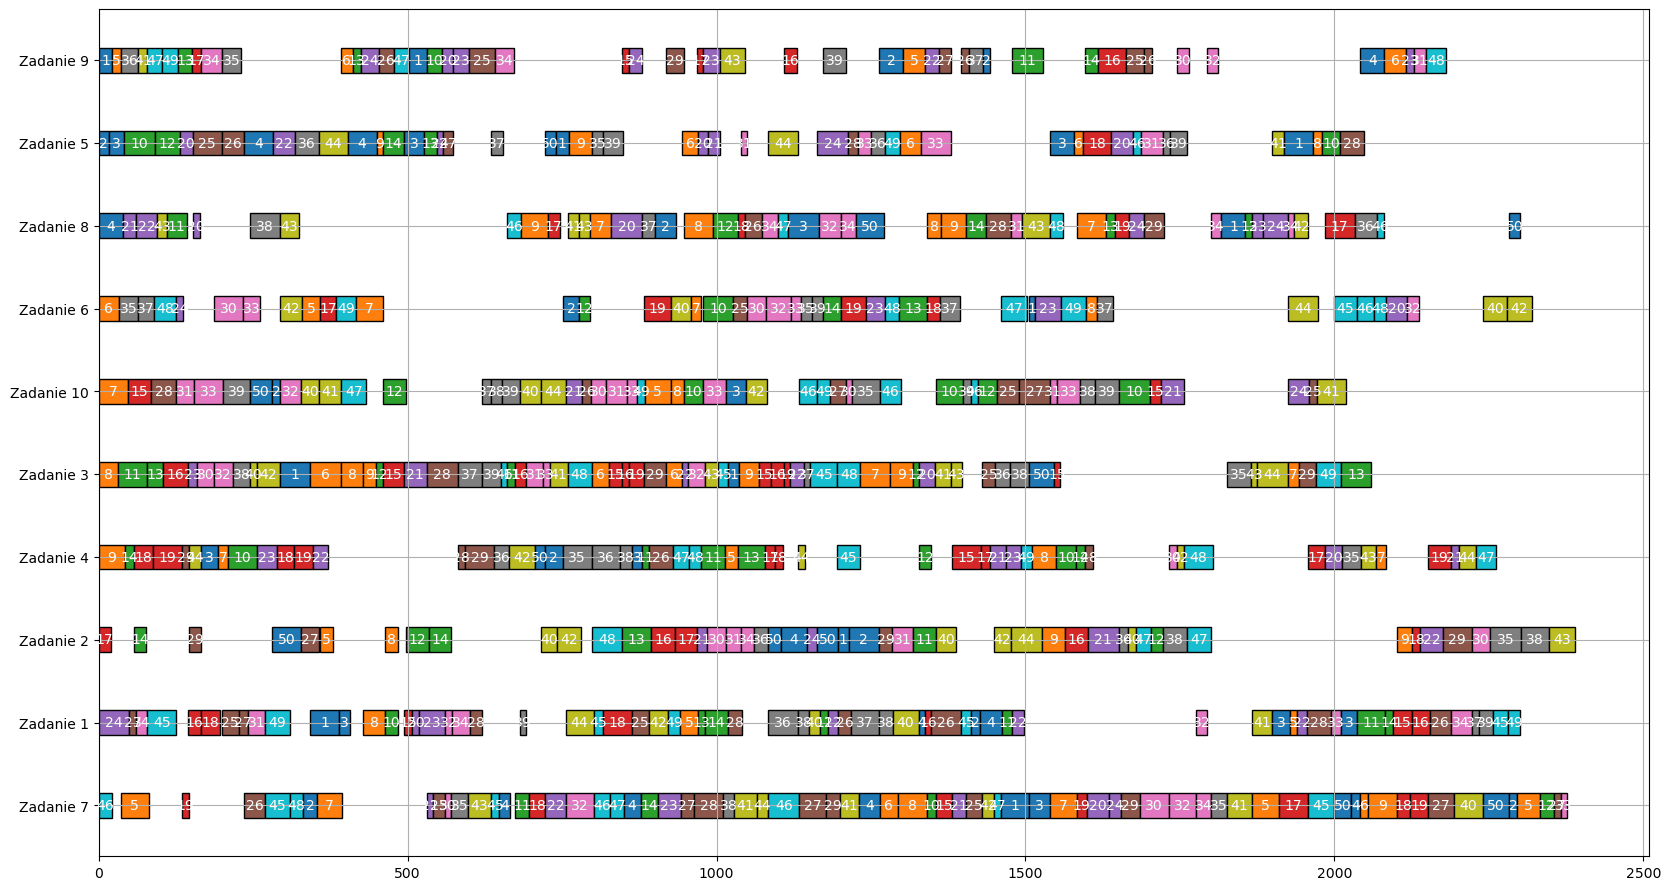

In [484]:
# timetables = morg.create_timetables(list_of_machines)
timetables_copy = timetables.copy()
morg.create_gantt_graph(timetables_copy)
# cost = morg.cost_function(timetables)

0.0%
0.001%
0.002%
0.003%
0.004%
0.005%
0.006%
0.006999999999999999%
0.008%
0.009000000000000001%
0.01%
0.011000000000000001%
0.012%
0.013%
0.013999999999999999%
0.015%
0.016%
0.017%
0.018000000000000002%
0.019%
0.02%
0.021%
0.022000000000000002%
0.023%
0.024%
0.025%
0.026%
0.027%
0.027999999999999997%
0.029%
0.03%
0.031%
0.032%
0.033%
0.034%
0.034999999999999996%
0.036000000000000004%
0.037%
0.038%
0.039%
0.04%
0.041%
0.042%
0.043%
0.044000000000000004%
0.045%
0.046%
0.047%
0.048%
0.049%
0.05%
0.051000000000000004%
0.052%
0.053%
0.054%
0.055%
0.055999999999999994%
0.056999999999999995%
0.058%
0.059000000000000004%
0.06%
0.061%
0.062%
0.063%
0.064%
0.065%
0.066%
0.067%
0.068%
0.06899999999999999%
0.06999999999999999%
0.07100000000000001%
0.07200000000000001%
0.073%
0.074%
0.075%
0.076%
0.077%
0.078%
0.079%
0.08%
0.08099999999999999%
0.082%
0.083%
0.084%
0.08499999999999999%
0.086%
0.087%
0.08800000000000001%
0.089%
0.09%
0.091%
0.092%
0.093%
0.094%
0.095%
0.096%
0.097%
0.098%
0.099%
0.

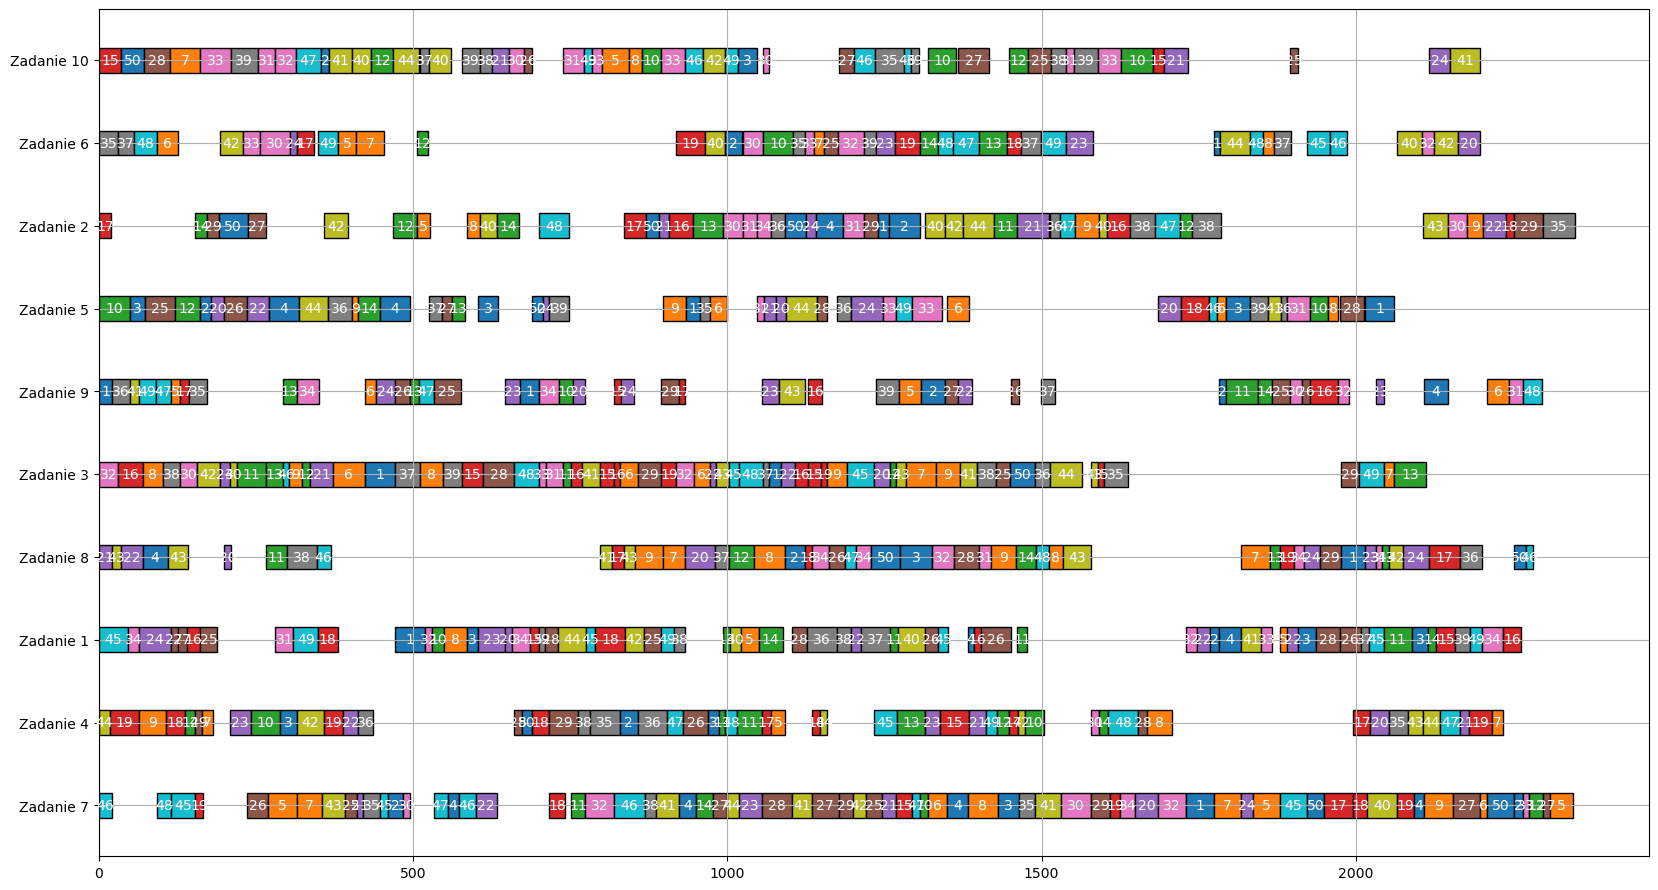

In [485]:
timetables_copy = timetables.copy()
ga = GA(timetables_copy, morg)
ga.genetic(timetables_copy, morg)
# print((ga.gen_list[0][10]))